<a href="http://cocl.us/NotebooksPython101">
    <img src="https://ibm.box.com/shared/static/yfe6h4az47ktg2mm9h05wby2n7e8kei3.png" width="750" alt="IBM 10TB Storage" />
</a>

<img src="https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width="200" alt="cognitiveclass.ai logo" />

<h1>Classifying European Money Denominations: Training a Pre-trained model Solution</h1>

<h2>Table of Contents</h2>

<p>In this lab, you will train the pre-trained models to classify the European currency. You will use the dataset object you created in the previous lab.</p>
<ul>
    <li><a href="#ans">Answers</a>
        <ol>
            <li><a href="a31">Answer 3.1: Preparation</a></li>
            <li><a href="a32">Answer 3.2: Train the model</a></li>
            <li><a href="a33">Answer 3.3: Plot 5 Random Images with their predictions</a></li>
            <li><a href="a34">Answer 3.4: Use the second model <code>VGG16</code> to do the prediction</a></li>
        </ol>
    </li>
</ul>

<hr>

<h2 id="ans">Answers</h2>

<h3 id="a31">Answer 3.1: Preparation</h3><b>5 point</b>

<b>Step 1</b>: Load the pre-trained model <b>ResNet50</b>. Set <code>weights='imagenet'</code>

In [34]:
# Step 1: Load the pre-trained model ResNet50
import keras
from keras.layers import Dense, Flatten,Dropout
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
# 

In [ ]:
base=ResNet50(weights='imagenet')

In [6]:
TARGET_SIZE = (224, 224)
BATCH_SIZE = 5
CLASSES = ['5', '10', '20', '50', '100', '200', '500']
RANDOM_SEED = 0
train_data_dir = 'resources/data/train_data_keras'
train_generator = ImageDataGenerator().flow_from_directory(train_data_dir, target_size=TARGET_SIZE, batch_size=BATCH_SIZE, classes=CLASSES, seed=RANDOM_SEED,shuffle=True)
valid_data_dir = 'resources/data/validation_data_keras'
val_generator = ImageDataGenerator().flow_from_directory(valid_data_dir, target_size=TARGET_SIZE, batch_size=BATCH_SIZE, classes=CLASSES, seed=RANDOM_SEED,shuffle=True)

Found 70 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


<b>Step 2:</b> The following lines of code sets the attribute <code>trainable</code> to <code>False</code>. As a result, the parameters in these layers will not be affected by training.

In [7]:
# Step2: Set parameters in pre-train model to False
for layer in base.layers:
    layer.trainable=False

<b>Step 3</b>: <b>ResNet50</b> is used to classify 1000 different objects; as a result, the last layer has 1000 outputs. However, you are going to classify 7 different classes, so you need to remove the last layer and replace with the new classification layer.

In [10]:
# Step 3: Replace the old classification layer with the new classification layer
last_base=base.layers[-2].output
connected_model=Dense(len(CLASSES),activation='softmax')(last_base)
base_input=base.input
model=Model(inputs=base_input,outputs=connected_model)


Print out the model in order to show whether you get the correct answer.

In [11]:
# Answer for Question 3.1: Print the model

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,602,055 (90.03 MB)

 Trainable params: 14,343 (56.03 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

<h3 id="a32">Answer 3.2: Train the model</h3><b>5 points</b>

<b>Step 1</b>: Use the <code>model.compile()</code> to set the configuration for the model. Use the optimizer <b>Adam</b>, loss function <b>categorical_crossentropy</b> and <code>metrics = ['accuracy']</code> as the parameters for training the model.

In [12]:
# Step 1: Use model.compile() to set the configuration
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

<b>Step 2: </b>Train the model with 20 epochs.

In [16]:
# Step 2: Train the model
epochs=20
steps=train_generator.n//train_generator.batch_size
model.fit(train_generator,validation_data=val_generator,steps_per_epoch=steps,epochs=epochs)

/Users/govindswarooprahangdale/tfenv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 427ms/step - accuracy: 0.1662 - loss: 2.5550 - val_accuracy: 0.5429 - val_loss: 1.3381
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.8390 - loss: 0.9567 - val_accuracy: 0.9857 - val_loss: 0.5709
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step - accuracy: 1.0000 - loss: 0.2648 - val_accuracy: 0.9714 - val_loss: 0.3213
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 420ms/step - accuracy: 1.0000 - loss: 0.1382 - val_accuracy: 1.0000 - val_loss: 0.2158
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 402ms/step - accuracy: 1.0000 - loss: 0.0828 - val_accuracy: 1.0000 - val_loss: 0.1709
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 473ms/step - accuracy: 1.0000 - loss: 0.0529 - val_accuracy: 1.0000 - val_loss: 0.1395
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 439ms/step - accuracy: 1.0000 - loss: 0.0511 - val_accuracy: 1.0000 - val_loss: 0.1224
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 454ms/step - accuracy: 1.0000 - loss: 0.0346 - val_accuracy: 1.

The information of loss and accuarcy for both training and validation is in <code>model.history.history</code>. Get the training history, and store the history into <code>train_history</code>.

In [17]:
# Get the training history

train_history = model.history.history

<b>Step 3</b>: Plot out the result of loss for both training and validation.

In [18]:
import matplotlib.pyplot as plt

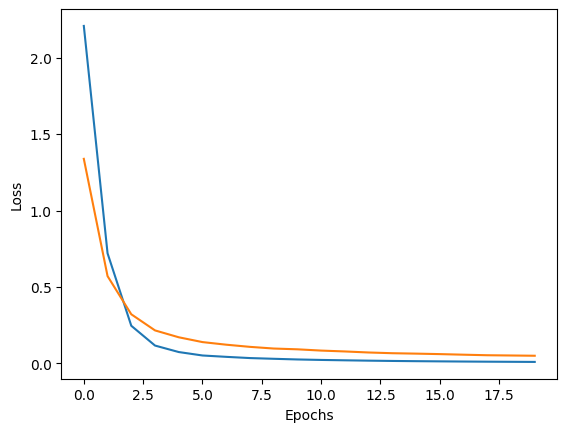

In [21]:
# Answer for Question 3.2: Plot the loss for both training and validation

plt.plot(train_history['loss'],label='Training Loss')
plt.plot(train_history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

<b>Step 4</b>: Plot out the result of accuracy for both training and validation.

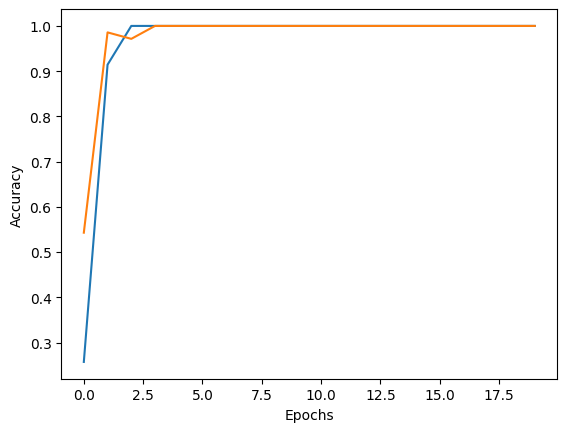

In [23]:
# Answer for Question 3.2: Plot the accuracy for both training and validation
plt.plot(train_history['accuracy'],label='Training Accuracy')
plt.plot(train_history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

<h3 id="a33">Answer 3.3: Plot 5 Random Images with their predictions</h3><b>3 points</b>

Use the <b>validation_dataset</b> to see whether model can predict. (You will use the <b>test_dataset</b> in the future lab. Use the <b>validation_dataset</b> for now.) Notice that you need to set the <code>shuffle</code> to <code>False</code>, so the the order of predictions will be the same as the file loading order.

In [36]:
test_data_dir='resources/data/test_data_keras'

In [37]:
# Generate test dataset and generate the prediction results

test_valid_generator = ImageDataGenerator().flow_from_directory(test_data_dir
                                                           , target_size=(224, 224)
                                                           , batch_size=5
                                                           , classes=CLASSES
                                                           , seed=0
                                                           , shuffle=False)

Found 70 images belonging to 7 classes.


Create a test dataset using validation data. Plot 5 random images which index is in the <code>numbers</code> list. Also print the predicted label and print a string indicate whether it has been correctly classified or mis-classified.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


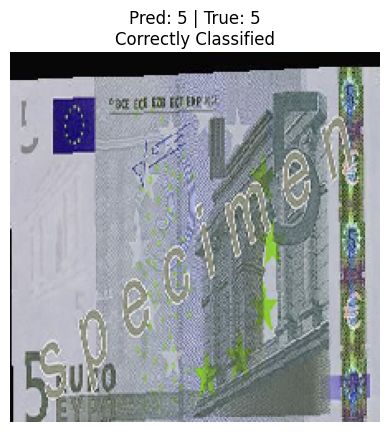

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


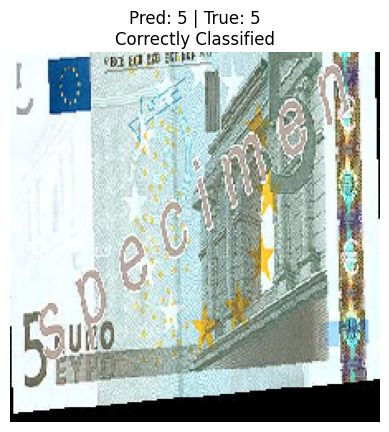

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


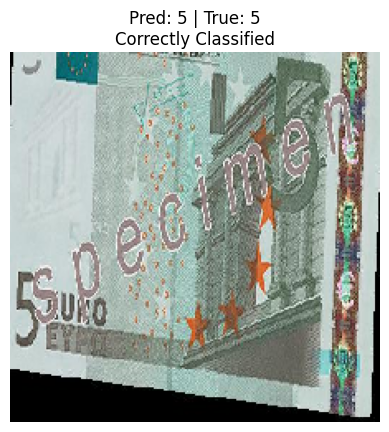

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


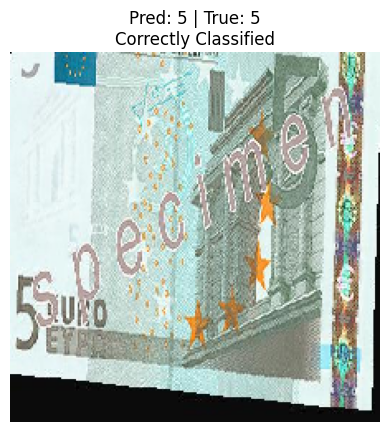

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


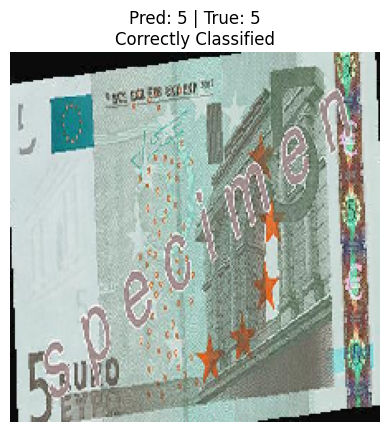

In [38]:
# Answer for Question 3.3: Plot five random images and their predictions
import numpy as np
val_images, val_labels = next(test_valid_generator)
class_names = list(CLASSES)

for i in range(5):
    image = val_images[i]
    true_label = np.argmax(val_labels[i])
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(prediction)

    # Plot the image
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')

    # Title with prediction info
    pred_class = class_names[predicted_label]
    true_class = class_names[true_label]
    result = "Correctly Classified" if predicted_label == true_label else "Misclassified"
    plt.title(f"Pred: {pred_class} | True: {true_class}\n{result}")
    plt.show()


<h3 id="a34">Answer 3.4: Use the second model <code>VGG16</code> to do the prediction</h3><b>5 points</b>

Repeat the steps in Question 3.1, 3.2 to predict the result using <code>VGG16</code> model. Then, print out the last validation accuracy.

In [33]:
# Answer for Question 3.4: Use VGG16 to train the model and print out the last validation accuracy.
from keras.applications.vgg16 import VGG16
basev=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))


In [35]:
basev.trainable=False
basev_input=basev.input
x = basev.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
connected_modelv = Dense(len(CLASSES), activation='softmax')(x)
modelv=Model(inputs=basev_input,outputs=connected_modelv)
print(modelv.summary())
modelv.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
epochs=20
steps=train_generator.n // train_generator.batch_size
modelv.fit(train_generator,validation_data=val_generator,steps_per_epoch=steps,epochs=epochs)
train_historyv=modelv.history.history
plt.plot(train_historyv['loss'],label='Training Loss')
plt.plot(train_historyv['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(train_historyv['accuracy'],label='Training Accuracy')
plt.plot(train_historyv['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
val_images,val_labels=next(val_generator)
for i in range(5):
    image=val_images[i]
    true_label=np.argmax(val_labels[i])
    prediction=modelv.predict(np.expand_dims(image,axis=0))
    predicted_label=np.argmax(prediction)

    plt.imshow(image.astype(np.uint8))
    plt.axis('off')
    pred_class=class_names[predicted_label]
    true_class=class_names[true_label]
    result='Correctly Classified' if predicted_label==true_label else 'MisClassified'
    plt.title(f'Prediction: {pred_class} | True: {true_class}\n{result}')
    plt.show()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,139,271 (80.64 MB)

 Trainable params: 6,424,583 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.3048 - loss: 47.0768 - val_accuracy: 0.9857 - val_loss: 0.0174
Epoch 2/20
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 564ms/step - accuracy: 0.8680 - loss: 5.0054

KeyboardInterrupt: 

<a href="http://cocl.us/NotebooksPython101bottom">
    <img src="https://ibm.box.com/shared/static/irypdxea2q4th88zu1o1tsd06dya10go.png" width="750" alt="course Python 101"/>
</a>


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a> 

<hr>

Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.